In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.datasets import make_classification    #for generating fake data
X, y = make_classification(n_samples=10000, n_features=10,n_informative=3)
print("start: ",X.shape, y.shape)

start:  (10000, 10) (10000,)


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42)
print("train: ", X_train.shape, y_train.shape)
print("test:  " , X_test.shape, y_test.shape)

train:  (8000, 10) (8000,)
test:   (2000, 10) (2000,)


In [21]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, Normalizer

# scaler = StandardScaler() # Knn best k: weighted avg- uniform- 0.7328 / distance- 0.7321 # SVM: weighted avg - 0.7400  # Perceptron - 0.67
# scaler = MinMaxScaler() # Knn best k: weighted avg- uniform- 0.7268 / distance- 0.7262 # SVM: weighted avg - 0.7424  # Perceptron - 0.65
scaler = RobustScaler() # Knn best k:weighted avg- uniform- 0.7306 / distance- 0.7306 # SVM: weighted avg - 0.7464  # Perceptron - 0.64
# scaler = Normalizer() # Knn best k: weighted avg- uniform- 0.7009 / distance- 0.7250  # SVM: weighted avg - 0.6969  # Perceptron - 0.63
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# fit and transform both train and test

In [25]:
ada_boost_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R", 
    learning_rate=0.5, 
    random_state=42
)
ada_boost_classifier.fit(X_train, y_train)


ada_y_pred_test = ada_boost_classifier.predict(X_test)
ada_y_pred_train = ada_boost_classifier.predict(X_train)

print(f'Ada Accuracy on train set: {accuracy_score(y_train, ada_y_pred_train)}')
print(f'Ada Accuracy on test set: {accuracy_score(y_test, ada_y_pred_test)}')
print(f'Ada Difference: {abs(accuracy_score(y_train, ada_y_pred_train) - accuracy_score(y_test, ada_y_pred_test))}')

Ada Accuracy on train set: 0.952375
Ada Accuracy on test set: 0.9415
Ada Difference: 0.010874999999999968


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       986
           1       0.94      0.95      0.94      1014

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



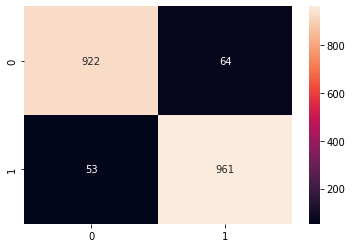

In [26]:
# classification_report
print(classification_report(y_test, ada_y_pred_test))

# confusion matrix
cm = confusion_matrix(y_test, ada_y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4012
           1       0.95      0.96      0.95      3988

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000



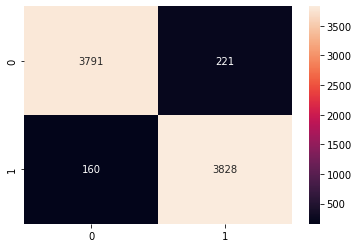

In [27]:
# classification_report
print(classification_report(y_train, ada_y_pred_train))

# confusion matrix
cm = confusion_matrix(y_train, ada_y_pred_train)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()